In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorboard.backend.event_processing import event_accumulator

In [2]:
def read_all_scalars(log_path):
    ea = event_accumulator.EventAccumulator(log_path,
        size_guidance={
            event_accumulator.SCALARS: 0,
        })
    ea.Reload() # loads events from file
    tags = ea.Tags()["scalars"]
    metrics = {
        
    }
    for tag in tags:
        metrics[tag] = ea.Scalars(tag)

    return metrics

In [52]:
# Set the path to your tensorboard log

scalars = read_all_scalars("../outputs/rdd2020_260x460/tf_logs/events.out.tfevents.1619092059.jupyter_fredralm.1620.0")
scalars2 = read_all_scalars("../outputs/rdd2020_260x460/tf_logs/events.out.tfevents.1619180700.jupyter_fredralm.1156.0")
scalars3 = read_all_scalars("../outputs/rdd2020/tf_logs/events.out.tfevents.1619282829.jupyter_fredralm.1011.0")
scalars4 = read_all_scalars("../outputs/rdd2020/tf_logs/events.out.tfevents.1619315664.jupyter_fredralm.314.0")
scalars5 = read_all_scalars("../outputs/rdd2020_338x600_wide/tf_logs/events.out.tfevents.1619125472.jupyter_fredralm.1998.0")
scalars6 = read_all_scalars("../outputs/rdd2020_338x600_wide/tf_logs/events.out.tfevents.1619169385.jupyter_fredralm.337.0")


In [53]:
print("Possible scalars to plot:")
for tag in scalars5.keys():
    print("\t", tag)

Possible scalars to plot:
	 losses/total_loss
	 losses/reg_loss
	 losses/cls_loss
	 lr
	 metrics/rdd2020_val/mAP
	 metrics/rdd2020_val/D00
	 metrics/rdd2020_val/D10
	 metrics/rdd2020_val/D20
	 metrics/rdd2020_val/D40


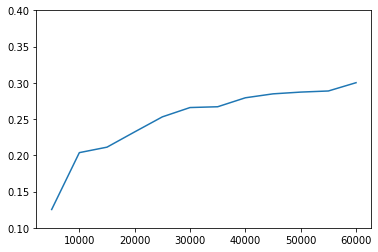

In [62]:
tag_to_plot = "metrics/rdd2020_val/mAP"
values = scalars[tag_to_plot] + scalars2[tag_to_plot]
iterations = [val.step for val in values]
values = [val.value for val in values]
plt.ylim([0.1, 0.4])
#plt.xlim([4000, 35000])
plt.plot(iterations, values)
#plt.savefig('RDDmAP_resnet18260x460.png')

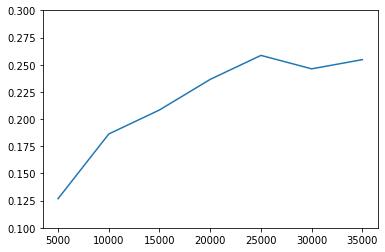

In [58]:
tag_to_plot = "metrics/rdd2020_val/mAP"
#values = scalars3[tag_to_plot] + scalars4[tag_to_plot]
values = scalars5[tag_to_plot] + scalars6[tag_to_plot]
iterations = [val.step for val in values]
values = [val.value for val in values]
plt.ylim([0.1, 0.3])
plt.plot(iterations, values)
plt.savefig('RDDmAP_resnet18_338x600.png')

In [24]:
%load_ext tensorboard

In [1]:
%load_ext tensorboard
%tensorboard --logdir TDT4265-StarterCode/Project/SSD/outputs/rdd2020_460x260/tf_logs
